# CIFAR10

## CHスコア

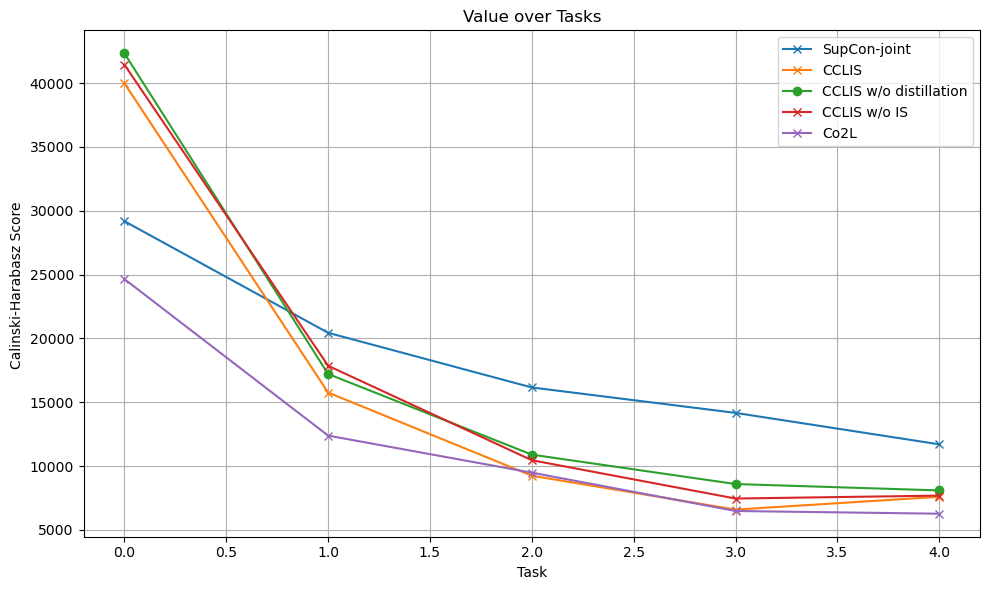

In [1]:
import re
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# ---------- ユーザ設定 ---------------------------------
method_log_files = {
    'SupCon-joint': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/supcon-joint/lr1_supcon-joint_ring0_cifar10_seed0_date2025_05_12/annalyze/score/offline_False/cal_score.csv",
    ],
    'CCLIS': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/cclis/cclis_cclis_ring2000_cifar10_seed0_date2025_05_11/annalyze/score/offline_False/cal_score.csv"
    ],
    'CCLIS w/o distillation': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/cclis/cclis_cclis_ring2000_cifar10_seed1_date2025_05_21/annalyze/score/offline_False/cal_score.csv"
    ],
    'CCLIS w/o IS': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/cclis/cclis_cclis-wo_ring2000_cifar10_seed1_date2025_05_22/annalyze/score/offline_False/cal_score.csv"
    ],
    'Co2L': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/co2l/co2l_co2l_ring2000_cifar10_seed0_date2025_05_13/annalyze/score/offline_False/cal_score.csv"
    ],
    # 'SupCon': [
    #     "/home/kouyou/ContinualLearning/survey/Analysis/logs/supcon-joint/practice_supcon_ring0_cifar10_seed0_date2025_05_09/annalyze/score/offline_False/cal_score.csv",
    # ],
}

# ---------- データの読み込みと整形 ------------------------
all_data = []

for method, paths in method_log_files.items():
    for path in paths:
        df = pd.read_csv(path)

        # task_model列が存在しない場合，task_dataを代わりに使用
        x_column = 'task_model' if 'task_model' in df.columns else 'task_data'

        # 各ファイルにmethod列を追加して識別
        df['method'] = method
        df['x'] = df[x_column]
        all_data.append(df[['x', 'value', 'method']])

# データを連結
plot_df = pd.concat(all_data, ignore_index=True)

# ---------- グラフ描画 -----------------------------------
plt.figure(figsize=(10, 6))

for method in plot_df['method'].unique():
    method_data = plot_df[plot_df['method'] == method]
    if method in ["CCLIS w/o distillation"]:
        plt.plot(method_data['x'], method_data['value'], marker='o', label=method)
    else:
        plt.plot(method_data['x'], method_data['value'], marker='x', label=method)

plt.xlabel('Task')
plt.ylabel('Calinski-Harabasz Score ')
plt.title('Value over Tasks')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("./cal_score.pdf")
plt.show()

## クラス内分散

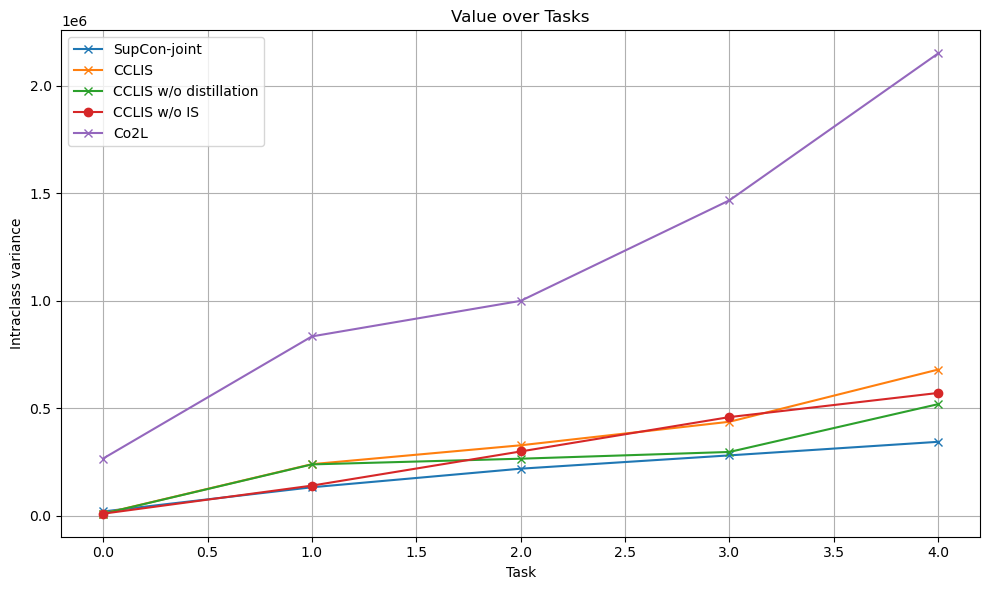

In [3]:
import re
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# ---------- ユーザ設定 ---------------------------------
method_log_files = {
    'SupCon-joint': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/supcon-joint/lr1_supcon-joint_ring0_cifar10_seed0_date2025_05_12/annalyze/score/offline_False/trW_score.csv",
    ],
    'CCLIS': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/cclis/cclis_cclis_ring2000_cifar10_seed0_date2025_05_11/annalyze/score/offline_False/trW_score.csv"
    ],
    'CCLIS w/o distillation': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/cclis/cclis_cclis_ring2000_cifar10_seed1_date2025_05_21/annalyze/score/offline_False/trW_score.csv"
    ],
    'CCLIS w/o IS': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/cclis/cclis_cclis-wo_ring2000_cifar10_seed1_date2025_05_22/annalyze/score/offline_False/trW_score.csv"
    ],
    'Co2L': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/co2l/co2l_co2l_ring2000_cifar10_seed0_date2025_05_13/annalyze/score/offline_False/trW_score.csv",
    ],
}

# ---------- データの読み込みと整形 ------------------------
all_data = []

for method, paths in method_log_files.items():
    for path in paths:
        df = pd.read_csv(path)

        # task_model列が存在しない場合，task_dataを代わりに使用
        x_column = 'task_model' if 'task_model' in df.columns else 'task_data'

        # 各ファイルにmethod列を追加して識別
        df['method'] = method
        df['x'] = df[x_column]
        all_data.append(df[['x', 'value', 'method']])

# データを連結
plot_df = pd.concat(all_data, ignore_index=True)

# ---------- グラフ描画 -----------------------------------
plt.figure(figsize=(10, 6))

for method in plot_df['method'].unique():
    method_data = plot_df[plot_df['method'] == method]
    # plt.plot(method_data['x'], method_data['value'], marker='o', label=method)
    if method in ["CCLIS w/o IS"]:
        plt.plot(method_data['x'], method_data['value'], marker='o', label=method)
    else:
        plt.plot(method_data['x'], method_data['value'], marker='x', label=method)

plt.xlabel('Task')
plt.ylabel('Intraclass variance')
plt.title('Value over Tasks')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("./intraclass_variance.pdf")
plt.show()

## クラス間分散

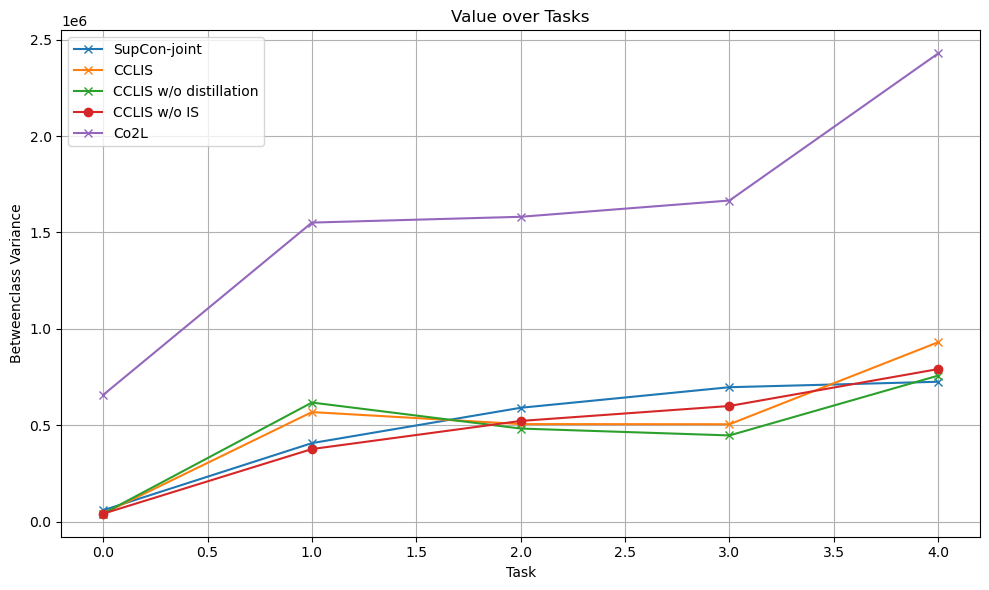

In [4]:
import re
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# ---------- ユーザ設定 ---------------------------------
method_log_files = {
    'SupCon-joint': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/supcon-joint/lr1_supcon-joint_ring0_cifar10_seed0_date2025_05_12/annalyze/score/offline_False/trB_score.csv",
    ],
    'CCLIS': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/cclis/cclis_cclis_ring2000_cifar10_seed0_date2025_05_11/annalyze/score/offline_False/trB_score.csv"
    ],
    'CCLIS w/o distillation': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/cclis/cclis_cclis_ring2000_cifar10_seed1_date2025_05_21/annalyze/score/offline_False/trB_score.csv"
    ],
    'CCLIS w/o IS': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/cclis/cclis_cclis-wo_ring2000_cifar10_seed1_date2025_05_22/annalyze/score/offline_False/trB_score.csv"
    ],
    'Co2L': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/co2l/co2l_co2l_ring2000_cifar10_seed0_date2025_05_13/annalyze/score/offline_False/trB_score.csv",
    ],
}

# ---------- データの読み込みと整形 ------------------------
all_data = []

for method, paths in method_log_files.items():
    for path in paths:
        df = pd.read_csv(path)

        # task_model列が存在しない場合，task_dataを代わりに使用
        x_column = 'task_model' if 'task_model' in df.columns else 'task_data'

        # 各ファイルにmethod列を追加して識別
        df['method'] = method
        df['x'] = df[x_column]
        all_data.append(df[['x', 'value', 'method']])

# データを連結
plot_df = pd.concat(all_data, ignore_index=True)

# ---------- グラフ描画 -----------------------------------
plt.figure(figsize=(10, 6))

for method in plot_df['method'].unique():
    method_data = plot_df[plot_df['method'] == method]
    # plt.plot(method_data['x'], method_data['value'], marker='o', label=method)
    if method in ["CCLIS w/o IS"]:
        plt.plot(method_data['x'], method_data['value'], marker='o', label=method)
    else:
        plt.plot(method_data['x'], method_data['value'], marker='x', label=method)

plt.xlabel('Task')
plt.ylabel('Betweenclass Variance')
plt.title('Value over Tasks')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("./betweenclass_variance.pdf")
plt.show()

## シルエットスコア

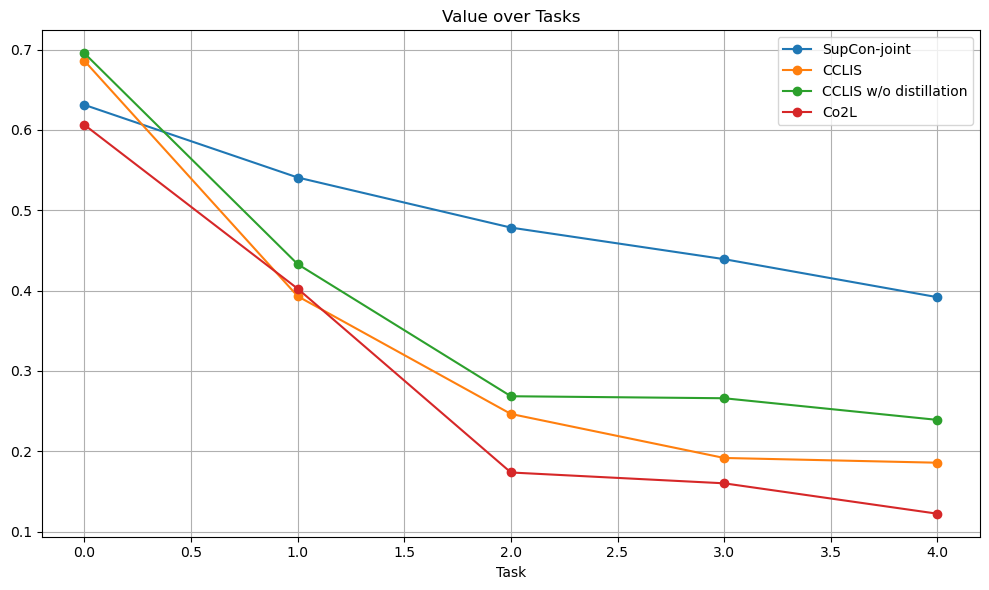

In [28]:
import re
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# ---------- ユーザ設定 ---------------------------------
method_log_files = {
    'SupCon-joint': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/supcon-joint/lr1_supcon-joint_ring0_cifar10_seed0_date2025_05_12/annalyze/score/offline_False/sil_score.csv",
    ],
    'CCLIS': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/cclis/cclis_cclis_ring2000_cifar10_seed0_date2025_05_11/annalyze/score/offline_False/sil_score.csv"
    ],
    'CCLIS w/o distillation': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/cclis/cclis_cclis_ring2000_cifar10_seed1_date2025_05_21/annalyze/score/offline_False/sil_score.csv"
    ],
    'Co2L': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/co2l/co2l_co2l_ring2000_cifar10_seed0_date2025_05_13/annalyze/score/offline_False/sil_score.csv"
    ],
    # 'SupCon': [
    #     "/home/kouyou/ContinualLearning/survey/Analysis/logs/supcon-joint/practice_supcon_ring0_cifar10_seed0_date2025_05_09/annalyze/score/offline_False/cal_score.csv",
    # ],
}

# ---------- データの読み込みと整形 ------------------------
all_data = []

for method, paths in method_log_files.items():
    for path in paths:
        df = pd.read_csv(path)

        # task_model列が存在しない場合，task_dataを代わりに使用
        x_column = 'task_model' if 'task_model' in df.columns else 'task_data'

        # 各ファイルにmethod列を追加して識別
        df['method'] = method
        df['x'] = df[x_column]
        all_data.append(df[['x', 'value', 'method']])

# データを連結
plot_df = pd.concat(all_data, ignore_index=True)

# ---------- グラフ描画 -----------------------------------
plt.figure(figsize=(10, 6))

for method in plot_df['method'].unique():
    method_data = plot_df[plot_df['method'] == method]
    plt.plot(method_data['x'], method_data['value'], marker='o', label=method)

plt.xlabel('Task')
plt.ylabel('')
plt.title('Value over Tasks')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("./sil_score.pdf")
plt.show()

# CIFAR100

## CHスコア

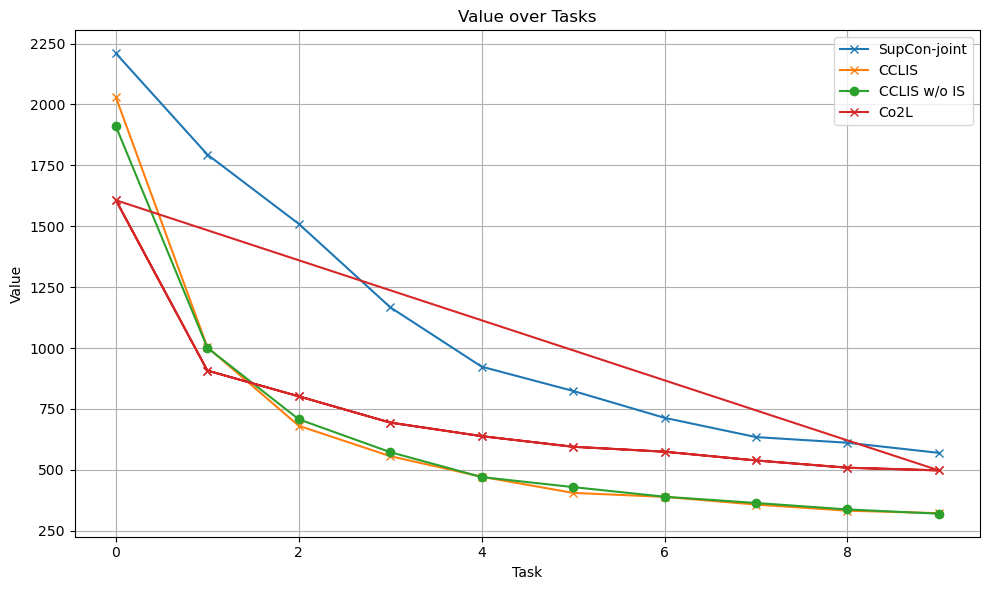

In [13]:
import re
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# ---------- ユーザ設定 ---------------------------------
method_log_files = {
    'SupCon-joint': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/supcon-joint/lr1_supcon-joint_ring0_cifar100_seed1_date2025_05_12/annalyze/score/offline_False/cal_score.csv",
    ],
    'CCLIS': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/cclis/cclis_cclis_ring2000_cifar100_seed0_date2025_05_11/annalyze/score/offline_False/cal_score.csv"
    ],
    'CCLIS w/o IS': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/cclis/cclis_cclis-wo_ring2000_cifar100_seed1_date2025_05_22/annalyze/score/offline_False/cal_score.csv"
    ],
    'Co2L': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/co2l/co2l_co2l_ring2000_cifar100_seed1_date2025_05_13/annalyze/score/offline_False/cal_score.csv"
    ],
    # 'SupCon': [
    #     "/data1/kouyou/ContinualLearning/survey/Analysis/logs/co2l/co2l_co2l_ring2000_cifar100_seed1_date2025_05_13/annalyze/score/offline_False/cal_score.csv",
    # ],
}

# ---------- データの読み込みと整形 ------------------------
all_data = []

for method, paths in method_log_files.items():
    for path in paths:
        df = pd.read_csv(path)

        # task_model列が存在しない場合，task_dataを代わりに使用
        x_column = 'task_model' if 'task_model' in df.columns else 'task_data'

        # 各ファイルにmethod列を追加して識別
        df['method'] = method
        df['x'] = df[x_column]
        all_data.append(df[['x', 'value', 'method']])

# データを連結
plot_df = pd.concat(all_data, ignore_index=True)

# ---------- グラフ描画 -----------------------------------
plt.figure(figsize=(10, 6))

for method in plot_df['method'].unique():
    method_data = plot_df[plot_df['method'] == method]
    if method in ["CCLIS w/o IS"]:
        plt.plot(method_data['x'], method_data['value'], marker='o', label=method)
    else:
        plt.plot(method_data['x'], method_data['value'], marker='x', label=method)

plt.xlabel('Task')
plt.ylabel('Value')
plt.title('Value over Tasks')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## クラス内分散

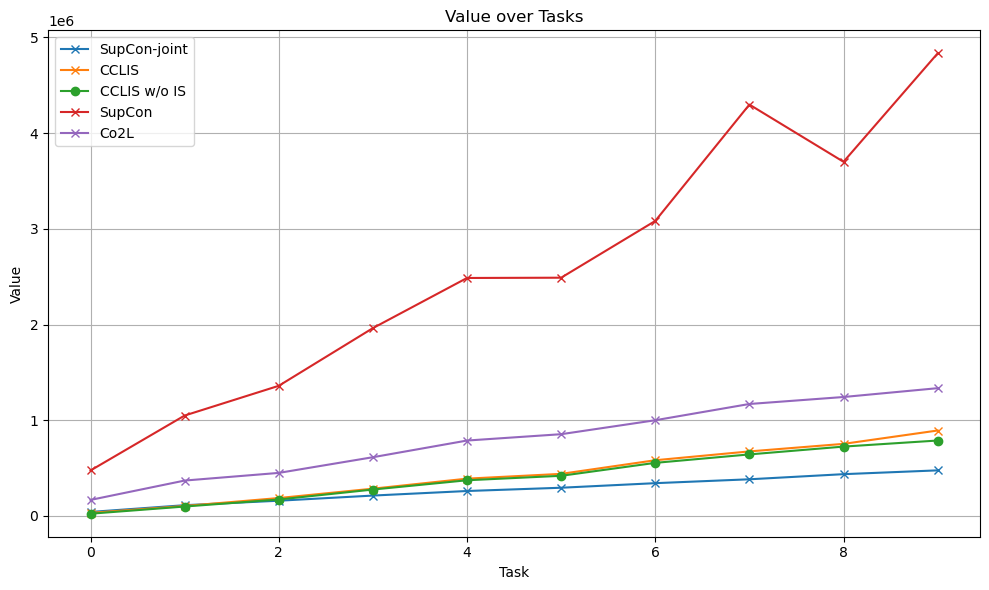

In [14]:
import re
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# ---------- ユーザ設定 ---------------------------------
method_log_files = {
    'SupCon-joint': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/supcon-joint/lr1_supcon-joint_ring0_cifar100_seed1_date2025_05_12/annalyze/score/offline_False/trW_score.csv",
    ],
    'CCLIS': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/cclis/cclis_cclis_ring2000_cifar100_seed0_date2025_05_11/annalyze/score/offline_False/trW_score.csv"
    ],
    'CCLIS w/o IS': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/cclis/cclis_cclis-wo_ring2000_cifar100_seed1_date2025_05_22/annalyze/score/offline_False/trW_score.csv"
    ],
    'SupCon': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/supcon-joint/practice_supcon_ring0_cifar100_seed0_date2025_05_09/annalyze/score/offline_False/trW_score.csv",
    ],
    'Co2L': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/co2l/co2l_co2l_ring2000_cifar100_seed1_date2025_05_13/annalyze/score/offline_False/trW_score.csv"
    ],
}

# ---------- データの読み込みと整形 ------------------------
all_data = []

for method, paths in method_log_files.items():
    for path in paths:
        df = pd.read_csv(path)

        # task_model列が存在しない場合，task_dataを代わりに使用
        x_column = 'task_model' if 'task_model' in df.columns else 'task_data'

        # 各ファイルにmethod列を追加して識別
        df['method'] = method
        df['x'] = df[x_column]
        all_data.append(df[['x', 'value', 'method']])

# データを連結
plot_df = pd.concat(all_data, ignore_index=True)

# ---------- グラフ描画 -----------------------------------
plt.figure(figsize=(10, 6))

for method in plot_df['method'].unique():
    method_data = plot_df[plot_df['method'] == method]
    if method in ["CCLIS w/o IS"]:
        plt.plot(method_data['x'], method_data['value'], marker='o', label=method)
    else:
        plt.plot(method_data['x'], method_data['value'], marker='x', label=method)

plt.xlabel('Task')
plt.ylabel('Value')
plt.title('Value over Tasks')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## クラス間分散

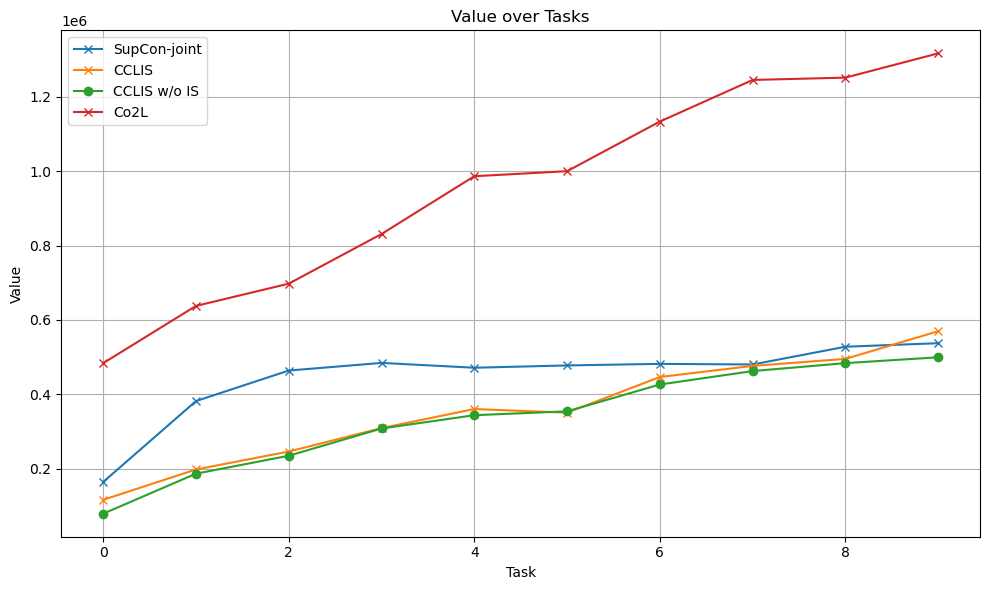

In [15]:
import re
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# ---------- ユーザ設定 ---------------------------------
method_log_files = {
    'SupCon-joint': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/supcon-joint/lr1_supcon-joint_ring0_cifar100_seed1_date2025_05_12/annalyze/score/offline_False/trB_score.csv",
    ],
    'CCLIS': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/cclis/cclis_cclis_ring2000_cifar100_seed0_date2025_05_11/annalyze/score/offline_False/trB_score.csv"
    ],
    'CCLIS w/o IS': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/cclis/cclis_cclis-wo_ring2000_cifar100_seed1_date2025_05_22/annalyze/score/offline_False/trB_score.csv"
    ],
    'Co2L': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/co2l/co2l_co2l_ring2000_cifar100_seed1_date2025_05_13/annalyze/score/offline_False/trB_score.csv"
    ],
    # 'SupCon': [
    #     "/home/kouyou/ContinualLearning/survey/Analysis/logs/supcon-joint/practice_supcon_ring0_cifar100_seed0_date2025_05_09/annalyze/score/offline_False/trB_score.csv",
    # ],
}

# ---------- データの読み込みと整形 ------------------------
all_data = []

for method, paths in method_log_files.items():
    for path in paths:
        df = pd.read_csv(path)

        # task_model列が存在しない場合，task_dataを代わりに使用
        x_column = 'task_model' if 'task_model' in df.columns else 'task_data'

        # 各ファイルにmethod列を追加して識別
        df['method'] = method
        df['x'] = df[x_column]
        all_data.append(df[['x', 'value', 'method']])

# データを連結
plot_df = pd.concat(all_data, ignore_index=True)

# ---------- グラフ描画 -----------------------------------
plt.figure(figsize=(10, 6))

for method in plot_df['method'].unique():
    method_data = plot_df[plot_df['method'] == method]
    if method in ["CCLIS w/o IS"]:
        plt.plot(method_data['x'], method_data['value'], marker='o', label=method)
    else:
        plt.plot(method_data['x'], method_data['value'], marker='x', label=method)

plt.xlabel('Task')
plt.ylabel('Value')
plt.title('Value over Tasks')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## シルエットスコア

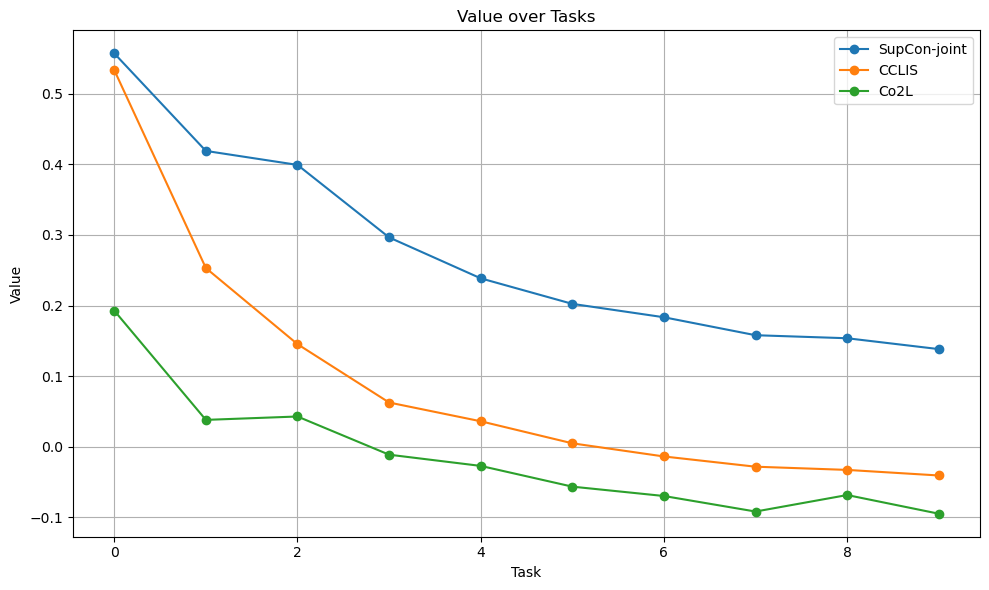

In [37]:
import re
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# ---------- ユーザ設定 ---------------------------------
method_log_files = {
    'SupCon-joint': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/supcon-joint/lr1_supcon-joint_ring0_cifar100_seed1_date2025_05_12/annalyze/score/offline_False/sil_score.csv",
    ],
    'CCLIS': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/cclis/cclis_cclis_ring2000_cifar100_seed0_date2025_05_11/annalyze/score/offline_False/sil_score.csv"
    ],
    'Co2L': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/co2l/co2l_co2l_ring2000_cifar100_seed1_date2025_05_13/annalyze/score/offline_False/sil_score.csv"
    ],
    # 'SupCon': [
    #     "/data1/kouyou/ContinualLearning/survey/Analysis/logs/co2l/co2l_co2l_ring2000_cifar100_seed1_date2025_05_13/annalyze/score/offline_False/cal_score.csv",
    # ],
}

# ---------- データの読み込みと整形 ------------------------
all_data = []

for method, paths in method_log_files.items():
    for path in paths:
        df = pd.read_csv(path)

        # task_model列が存在しない場合，task_dataを代わりに使用
        x_column = 'task_model' if 'task_model' in df.columns else 'task_data'

        # 各ファイルにmethod列を追加して識別
        df['method'] = method
        df['x'] = df[x_column]
        all_data.append(df[['x', 'value', 'method']])

# データを連結
plot_df = pd.concat(all_data, ignore_index=True)

# ---------- グラフ描画 -----------------------------------
plt.figure(figsize=(10, 6))

for method in plot_df['method'].unique():
    method_data = plot_df[plot_df['method'] == method]
    plt.plot(method_data['x'], method_data['value'], marker='o', label=method)

plt.xlabel('Task')
plt.ylabel('Value')
plt.title('Value over Tasks')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# tiny-imagenet

## CHスコア

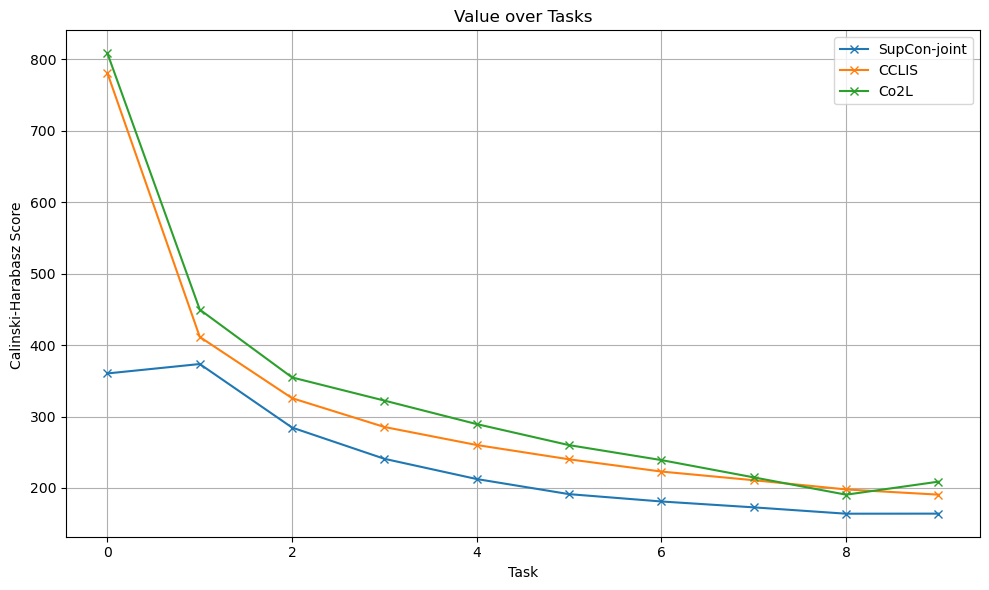

In [18]:
import re
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# ---------- ユーザ設定 ---------------------------------
method_log_files = {
    'SupCon-joint': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/supcon-joint/practice_supcon-joint_ring0_tiny-imagenet_seed0_date2025_05_01/annalyze/score/offline_False/cal_score.csv",
    ],
    'CCLIS': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/cclis/cclis_cclis_ring2000_tiny-imagenet_seed0_date2025_05_30/annalyze/score/offline_False/cal_score.csv"
    ],
    'Co2L': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/co2l/co2l_co2l_ring500_tiny-imagenet_seed0_date2025_06_02/annalyze/score/offline_False/cal_score.csv"
    ],
}

# ---------- データの読み込みと整形 ------------------------
all_data = []

for method, paths in method_log_files.items():
    for path in paths:
        df = pd.read_csv(path)

        # task_model列が存在しない場合，task_dataを代わりに使用
        x_column = 'task_model' if 'task_model' in df.columns else 'task_data'

        # 各ファイルにmethod列を追加して識別
        df['method'] = method
        df['x'] = df[x_column]
        all_data.append(df[['x', 'value', 'method']])

# データを連結
plot_df = pd.concat(all_data, ignore_index=True)

# ---------- グラフ描画 -----------------------------------
plt.figure(figsize=(10, 6))

for method in plot_df['method'].unique():
    method_data = plot_df[plot_df['method'] == method]
    if method in ["SupCon"]:
        plt.plot(method_data['x'], method_data['value'], marker='o', label=method)
    else:
        plt.plot(method_data['x'], method_data['value'], marker='x', label=method)

plt.xlabel('Task')
plt.ylabel('Calinski-Harabasz Score ')
plt.title('Value over Tasks')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("./cal_score_tinyimagenet.pdf")
plt.show()

## クラス内分散

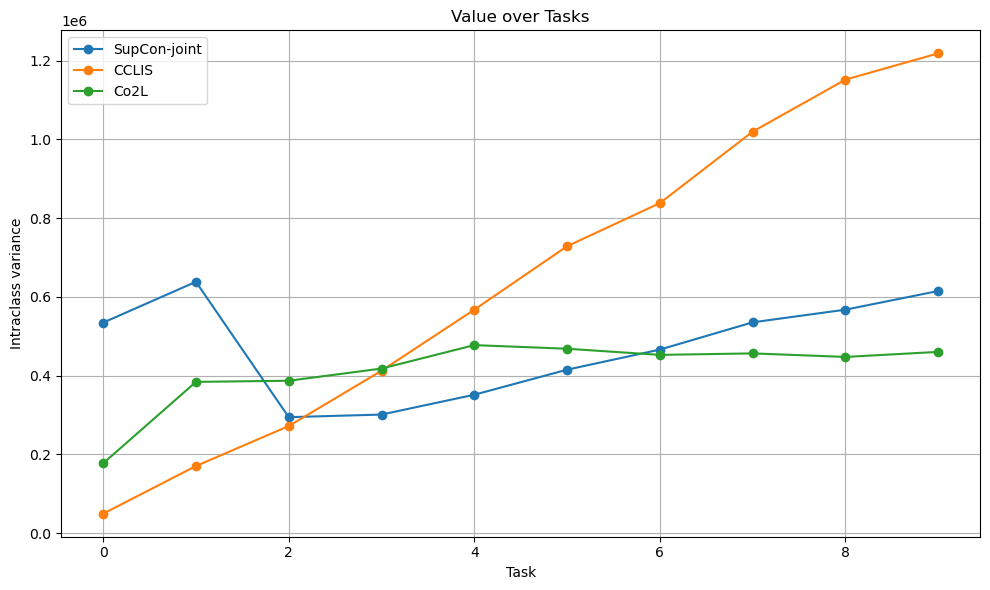

In [19]:
import re
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# ---------- ユーザ設定 ---------------------------------
method_log_files = {
    'SupCon-joint': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/supcon-joint/practice_supcon-joint_ring0_tiny-imagenet_seed0_date2025_05_01/annalyze/score/offline_False/trW_score.csv",
    ],
    'CCLIS': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/cclis/cclis_cclis_ring2000_tiny-imagenet_seed0_date2025_05_30/annalyze/score/offline_False/trW_score.csv"
    ],
    'Co2L': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/co2l/co2l_co2l_ring500_tiny-imagenet_seed0_date2025_06_02/annalyze/score/offline_False/trW_score.csv"
    ],
}

# ---------- データの読み込みと整形 ------------------------
all_data = []

for method, paths in method_log_files.items():
    for path in paths:
        df = pd.read_csv(path)

        # task_model列が存在しない場合，task_dataを代わりに使用
        x_column = 'task_model' if 'task_model' in df.columns else 'task_data'

        # 各ファイルにmethod列を追加して識別
        df['method'] = method
        df['x'] = df[x_column]
        all_data.append(df[['x', 'value', 'method']])

# データを連結
plot_df = pd.concat(all_data, ignore_index=True)

# ---------- グラフ描画 -----------------------------------
plt.figure(figsize=(10, 6))

for method in plot_df['method'].unique():
    method_data = plot_df[plot_df['method'] == method]
    plt.plot(method_data['x'], method_data['value'], marker='o', label=method)

plt.xlabel('Task')
plt.ylabel('Intraclass variance')
plt.title('Value over Tasks')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("./intraclass_variance_tinyimagenet.pdf")
plt.show()

## クラス間分散

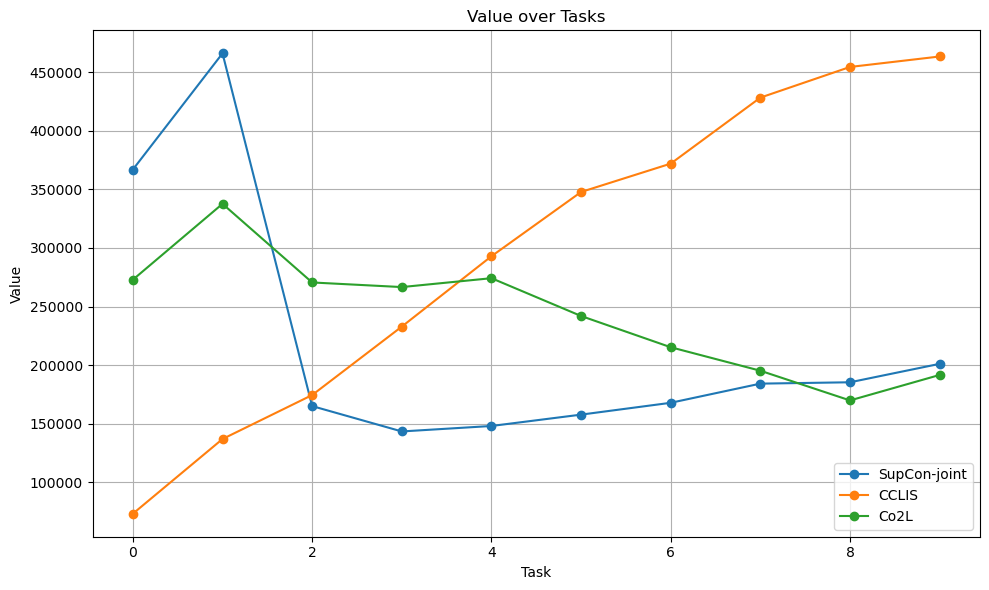

In [20]:
import re
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# ---------- ユーザ設定 ---------------------------------
method_log_files = {
    'SupCon-joint': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/supcon-joint/practice_supcon-joint_ring0_tiny-imagenet_seed0_date2025_05_01/annalyze/score/offline_False/trB_score.csv",
    ],
    'CCLIS': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/cclis/cclis_cclis_ring2000_tiny-imagenet_seed0_date2025_05_30/annalyze/score/offline_False/trB_score.csv"
    ],
    'Co2L': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/co2l/co2l_co2l_ring500_tiny-imagenet_seed0_date2025_06_02/annalyze/score/offline_False/trB_score.csv"
    ],
}

# ---------- データの読み込みと整形 ------------------------
all_data = []

for method, paths in method_log_files.items():
    for path in paths:
        df = pd.read_csv(path)

        # task_model列が存在しない場合，task_dataを代わりに使用
        x_column = 'task_model' if 'task_model' in df.columns else 'task_data'

        # 各ファイルにmethod列を追加して識別
        df['method'] = method
        df['x'] = df[x_column]
        all_data.append(df[['x', 'value', 'method']])

# データを連結
plot_df = pd.concat(all_data, ignore_index=True)

# ---------- グラフ描画 -----------------------------------
plt.figure(figsize=(10, 6))

for method in plot_df['method'].unique():
    method_data = plot_df[plot_df['method'] == method]
    plt.plot(method_data['x'], method_data['value'], marker='o', label=method)

plt.xlabel('Task')
plt.ylabel('Value')
plt.title('Value over Tasks')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("./betweenclass_variance_tinyimagenet.pdf")
plt.show()

## シルエットスコア

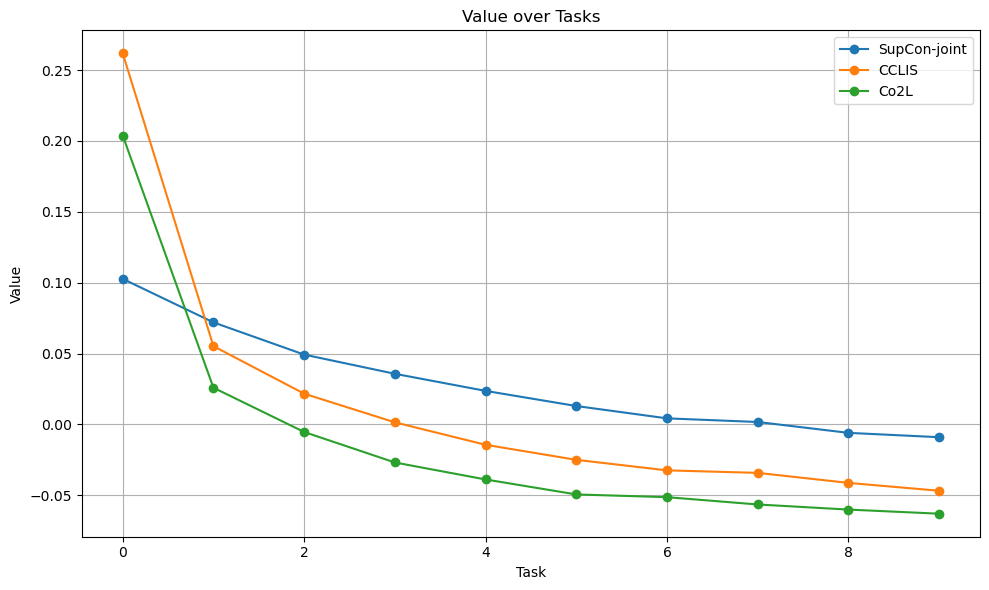

In [21]:
import re
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# ---------- ユーザ設定 ---------------------------------
method_log_files = {
    'SupCon-joint': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/supcon-joint/practice_supcon-joint_ring0_tiny-imagenet_seed0_date2025_05_01/annalyze/score/offline_False/sil_score.csv",
    ],
    'CCLIS': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/cclis/cclis_cclis_ring2000_tiny-imagenet_seed0_date2025_05_30/annalyze/score/offline_False/sil_score.csv"
    ],
    'Co2L': [
        "/home/kouyou/ContinualLearning/survey/Analysis/logs/co2l/co2l_co2l_ring500_tiny-imagenet_seed0_date2025_06_02/annalyze/score/offline_False/sil_score.csv"
    ],
}

# ---------- データの読み込みと整形 ------------------------
all_data = []

for method, paths in method_log_files.items():
    for path in paths:
        df = pd.read_csv(path)

        # task_model列が存在しない場合，task_dataを代わりに使用
        x_column = 'task_model' if 'task_model' in df.columns else 'task_data'

        # 各ファイルにmethod列を追加して識別
        df['method'] = method
        df['x'] = df[x_column]
        all_data.append(df[['x', 'value', 'method']])

# データを連結
plot_df = pd.concat(all_data, ignore_index=True)

# ---------- グラフ描画 -----------------------------------
plt.figure(figsize=(10, 6))

for method in plot_df['method'].unique():
    method_data = plot_df[plot_df['method'] == method]
    plt.plot(method_data['x'], method_data['value'], marker='o', label=method)

plt.xlabel('Task')
plt.ylabel('Value')
plt.title('Value over Tasks')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("./sil_score_tinyimagenet.pdf")
plt.show()